## **FAREENA NOOR (SP23-BAI-012)**

## **FARHEEN ANWAR (SP23-BAI-013)**

## **1. DATASET SELECTION**

Dataset selection is essential for ensuring the relevance and accuracy of data analysis. A well-chosen dataset helps achieve meaningful insights and supports the goals of the analysis effectively.

### **1.1 Importing Libraries**

Importing pandas, seaborn, matplotlib.pyplot, and numpy for data manipulation and visualization.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### **1.2 Data Loading**

Loading the Titanic dataset from Seaborn

In [3]:
data = sns.load_dataset('titanic')

### **1.3 Creating Copy Dataframe**

Creating a copy of the Titanic dataset

In [4]:
data_cleaned = data.copy()

### **1.4 Data Information**

Displaying the summary information of the `data_cleaned` DataFrame 

In [5]:
# Overview of the dataset
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### **1.5 Data Description**

Generating descriptive statistics for the `data_cleaned` DataFrame 

In [6]:
print(data_cleaned.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### **1.6 Data Display**

Displaying the first 10 rows of the `data_cleaned` DataFrame.

In [7]:
data_cleaned.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## **2. DATA PREPROCESSING & CLEANING**

Data preprocessing and cleaning involve transforming raw data into a structured and usable format by handling missing values and inconsistencies. This step ensures the dataset is accurate, reliable, and ready for analysis.

### **2.1 Median Imputation**

Filling missing values in the "age" column with the median age in the `data_cleaned` dataset.

In [ ]:
data_cleaned['age'].fillna(data_cleaned['age'].median(), inplace=True)


### **2.2 Mean Imputation**

Filling missing values in the "embark_town" column with the most frequent value (mode) in the `data_cleaned` dataset.

In [ ]:
data_cleaned['embark_town'].fillna(data_cleaned['embark_town'].mode()[0],inplace=True)

### **2.3 Mode Imputation**

Filling missing values in the "embarked" column with the most frequent value (mode) in the `data_cleaned` dataset.

In [ ]:
data_cleaned['embarked'].fillna(data_cleaned['embarked'].mode()[0], inplace=True)

### **2.4 Column Dropping**

Dropping the "deck" column from the `data_cleaned` dataset due to excessive missing values.

In [11]:
data_cleaned.drop(columns=['deck'], inplace=True)

### **2.5 Null Value Check**

Verifying missing values in the `data_cleaned` dataset by printing the count of null values in each column.

In [12]:
print(data_cleaned.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


### **2.6 Encoding Categorical Variable**

Encoding categorical variables using One-Hot Encoding and Binary Encoding 

#### **2.6.1 Binary Encoding**

Encoding the "sex" column as binary, with 0 for female and 1 for male, in the `data_cleaned` dataset.

In [13]:
data_cleaned['sex'] = data_cleaned['sex'].map({'female': 0, 'male': 1})

#### **2.6.2 One-hot Encoding**

Encoding the "embarked" and "embark_town" column using one-hot encoding and dropping the first category to avoid multicollinearity in the `data_cleaned` dataset.

In [14]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['embarked'], drop_first=True)

In [15]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['embark_town'], drop_first=True)

In [16]:
data_cleaned.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,Third,man,True,no,False,False,True,False,True
1,1,1,0,38.0,1,0,71.2833,First,woman,False,yes,False,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,Third,woman,False,yes,True,False,True,False,True
3,1,1,0,35.0,1,0,53.1000,First,woman,False,yes,False,False,True,False,True
4,0,3,1,35.0,0,0,8.0500,Third,man,True,no,True,False,True,False,True
5,0,3,1,28.0,0,0,8.4583,Third,man,True,no,True,True,False,True,False
6,0,1,1,54.0,0,0,51.8625,First,man,True,no,True,False,True,False,True
7,0,3,1,2.0,3,1,21.0750,Third,child,False,no,False,False,True,False,True
8,1,3,0,27.0,0,2,11.1333,Third,woman,False,yes,False,False,True,False,True
9,1,2,0,14.0,1,0,30.0708,Second,child,False,yes,False,False,False,False,False


## **3. EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis (EDA) helps in understanding the dataset by visualizing patterns, trends, and relationships. It allows for the detection of outliers, missing values, and provides a foundation for further analysis.

### **3.1 Histogram**

Plotting the distribution of the "age" column as a histogram with 20 bins, using sky blue color and black edges, to visualize the frequency of age values in the `data_cleaned` dataset.

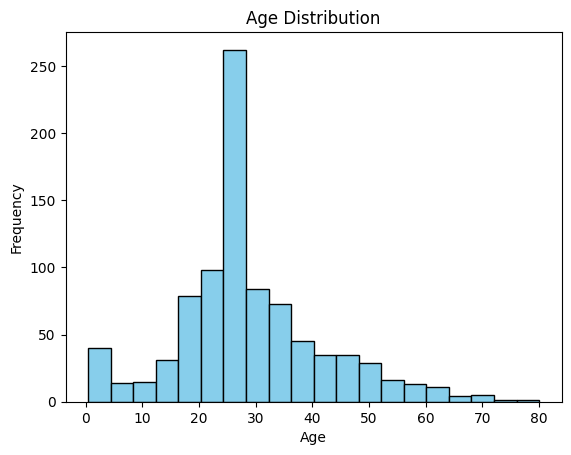

In [22]:
data_cleaned['age'].plot(kind = 'hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()






















### **3.2 Scatter Plot**

Creating a scatter plot to visualize the relationship between "age" and "fare" in the `data_cleaned` dataset, with light green points and a title "Age vs Fare".

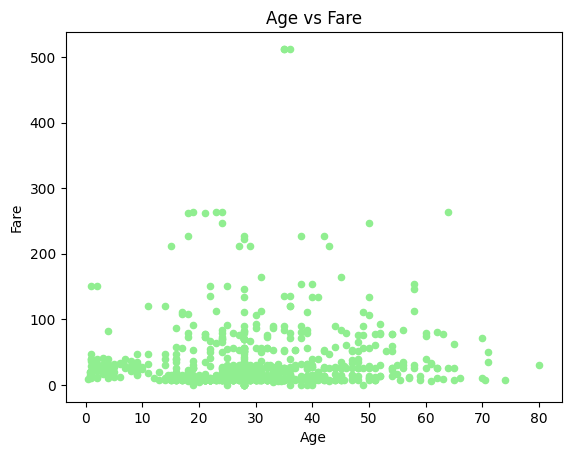

In [23]:
data_cleaned.plot(kind='scatter',x='age',y='fare',title='Age vs Fare',color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### **3.3 Pie Chart**

Creating a pie chart to display the distribution of survival status in the `data_cleaned` dataset, with labels for "Did Not Survive" and "Survived" and colors red and green.

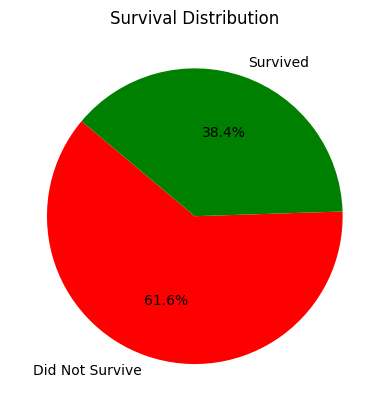

In [24]:
survival_counts = data_cleaned['survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['red', 'green']

plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Survival Distribution')
plt.show()

### **3.4 Bar Plot**

Creating a bar chart to show the survival count by gender in the `data_cleaned` dataset, with pink bars for females and light blue bars for males.

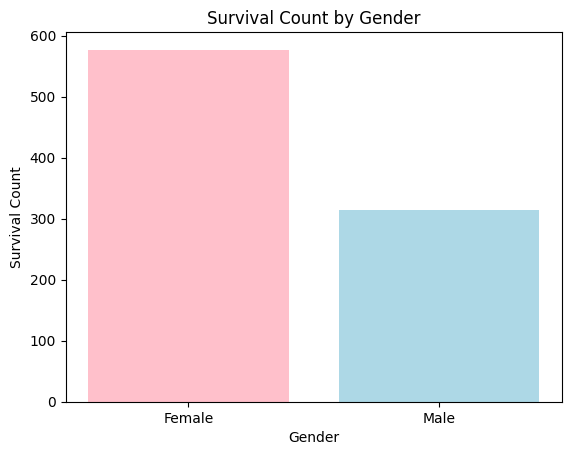

In [25]:
survival_by_gender = data_cleaned['sex'].value_counts()
labels = ['Female', 'Male']

plt.bar(labels, survival_by_gender, color=['pink', 'lightblue'])
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Count')
plt.show()

### **3.5 Box Plot**

Creating a box plot to visualize the distribution of "age" in the `data_cleaned` dataset, highlighting the median, quartiles, and potential outliers.

<Axes: title={'center': 'Age'}>

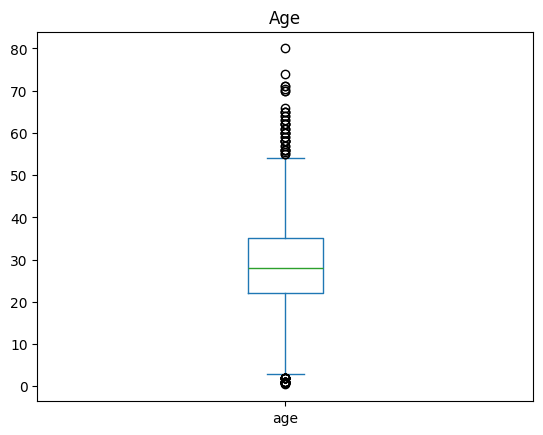

In [26]:
data_cleaned['age'].plot(kind='box',title='Age')

## **4. FEATURE VISUALIZATION**

Feature visualization helps in understanding the distribution and relationships of features through graphical representations. It aids in identifying patterns and correlations in the data.



### **4.1 Selecting Numeric Data**

Selecting the numeric columns (of types `float64` and `int64`) from the `data_cleaned` dataset, dropping any rows with missing values, and printing the shape of the resulting DataFrame.

In [27]:
X = data_cleaned.select_dtypes(include=['float64', 'int64']).dropna()
print('Numeric data_cleanedframe shape   :', X.shape)


Numeric data_cleanedframe shape   : (891, 7)


### **4.2 Standardization**

Calculating the mean and standard deviation of the numeric columns in `X`, then standardizing the data by subtracting the mean and dividing by the standard deviation to create the standardized dataset `Z`.

In [28]:

# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std


### **4.3 Covariance Matrix**

Calculating the covariance matrix of the standardized data `Z`, and plotting it as a heatmap with annotations, using the 'coolwarm' color map to visualize the relationships between the features.

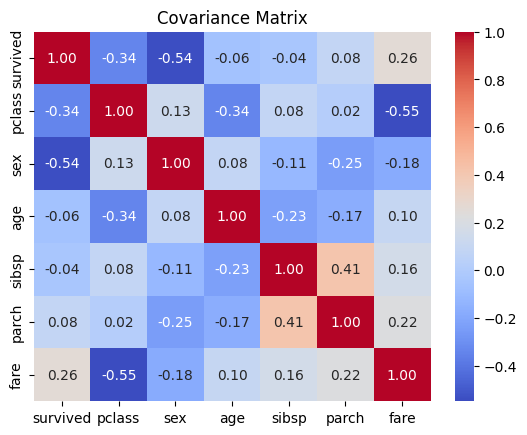

In [29]:

# Covariance matrix
c = Z.cov()

# Plot the covariance matrix
sns.heatmap(c, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()


### **4.4 Eigen Values & Eigen Vectors**

Calculating the eigenvalues and eigenvectors of the covariance matrix `c` using NumPy's `linalg.eig()` function, and printing the eigenvalues along with their shape and the shape of the eigenvectors.

In [30]:

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [2.10271822 1.68997675 1.16253367 0.33349781 0.4233213  0.72744317
 0.56050907]
Eigen values Shape: (7,)
Eigen Vector Shape: (7, 7)


In [31]:

# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# Sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:, idx]


### **4.5 Explained Variance**

Calculating the cumulative explained variance by dividing the cumulative sum of the eigenvalues by the total sum of eigenvalues, and printing the result to show the proportion of variance explained by each principal component.

In [32]:

# Calculate explained variance
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print('Explained Variance:', explained_var)


Explained Variance: [0.30038832 0.54181357 0.70788981 0.81181026 0.89188298 0.95235746
 1.        ]


### **4.6 Number of PCA Components**

Determining the number of principal components required to explain at least 50% of the variance by finding the index where the cumulative explained variance exceeds 50%, and printing the result.

In [33]:

# Determine the number of components to explain 50% variance
n_components = np.argmax(explained_var >= 0.50) + 1
print('Number of components for 50% variance:', n_components)


Number of components for 50% variance: 2


### **4.7 PCA Components**

Creating the PCA component matrix using the first `n_components` eigenvectors and visualizing it as a heatmap, where each column represents a principal component, and the values show the contribution of each feature to the components.

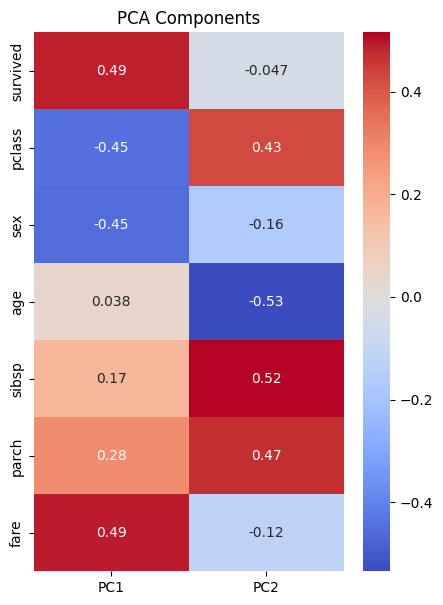

In [34]:

# PCA component or unit matrix
u = eigenvectors[:, :n_components]
pca_component = pd.DataFrame(u, 
                             index=X.columns, 
                             columns=[f'PC{i+1}' for i in range(n_components)])

# Plotting heatmap for PCA components
plt.figure(figsize=(5, 7))
sns.heatmap(pca_component, annot=True, cmap='coolwarm')
plt.title('PCA Components')
plt.show()


### **4.8 Principle Components Values**

Performing matrix multiplication (dot product) between the standardized data `Z` and the PCA component matrix to obtain the principal component values, then renaming the columns for clarity and printing the resulting principal components.

In [35]:

# Matrix multiplication or dot product
Z_pca = Z @ pca_component

# Rename the columns for clarity
Z_pca.columns = [f'PCA{i+1}' for i in range(n_components)]

# Print the Principal Component values
print('Principal Components:')
print(Z_pca)


Principal Components:
         PCA1      PCA2
0   -1.421363  0.634683
1    2.285491 -0.957269
2    0.400645  0.248334
3    2.095582 -0.788967
4   -1.527859 -0.369030
..        ...       ...
886 -0.969239 -0.564439
887  1.665642 -0.542322
888  0.413469  1.857066
889  0.735886 -1.173697
890 -1.539686 -0.245069

[891 rows x 2 columns]


In [36]:

# Optional: Add principal components to the original dataFrame
final_df = pd.concat([data_cleaned.reset_index(drop=True), Z_pca.reset_index(drop=True)], axis=1)

# Display the final data_cleanedFrame shape
print('Final dataframe shape:', final_df.shape)


Final dataframe shape: (891, 18)
